In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('segmentation.data')
df.shape

(210, 20)

In [3]:
le = LabelEncoder()
y = df['TARGET'].values
X = df.iloc[:, 1::].values
y = le.fit_transform(y)
print(f"X.shape[1]={X.shape[1]}")
print(f"X.shape[0]={X.shape[0]}")
print(f"y.shape[0]={y.shape[0]}")

X.shape[1]=19
X.shape[0]=210
y.shape[0]=210


In [4]:
test_sizes = np.array(range(2, 6))/10

train_scores = []
test_scores = []

for test_size in test_sizes:
    train_score, test_score = 0, 0
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=test_size)
    for i in range(5):
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(Xtr, ytr)
        train_score += knn.score(Xtr, ytr)
        test_score += knn.score(Xte, yte)
    train_scores.append(train_score/5)
    test_scores.append(test_score/5)    

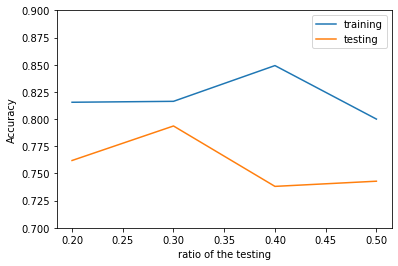

In [5]:
plt.plot(test_sizes, train_scores, label='training')
plt.plot(test_sizes, test_scores, label='testing')
plt.ylim(0.70,0.90)
plt.xlabel('ratio of the testing')
plt.ylabel('Accuracy')
plt.legend()
plt.show()